# Main code

In [1]:
import os
import numpy as np
import scipy.io
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import sys

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

[sklearn.linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)

[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## Read and preprocess mat files

After reading and preprocessing the data in the next code chunk, the data from all cells is stored in a population dictionary. The dictionary's keys correspond to the cell names, and the values contain the data for each respective cell.

The values in the population dictionary are cell dictionaries with keys being `'axons'`, `'green_dFFMeanValues'`,and `'red_dFFMeanValues'`:

- The value of `'axons'`, e.g., `cell_data_dict['CL090_230515']['axons']` is a 1 dimensional numpy array, of which the length is the number of groups and the elements are 1 dimensional numpy arrays consisting of components belonging to the group.
- The value of `'green_dFFMeanValues'` is a 2 dimensional 3 by 49 numpy array (each cell has 3 rounds, and each round has 8 directions \* 2 time frequencies \* 3 space frequencies = 48 settings plus a extra period so in total there are 49 columns), of which the elements are still 2 dimensional numpy arrays with size being 10 by N (N is the number of components).
- The value of `'red_dFFMeanValues'` is similarly a 2 dimensional 3 by 49 numpy array, of which the elements are still 2 dimensional numpy arrays with size being 10 by 1 (only recording the data at the soma).

In [2]:
root_path = "/content/drive/MyDrive/Fluorescence_Data/FluoData4Fitting_Average"

# Get a list of all the subdirectories: subfolders are viewed as cell names
cell_names = [f for f in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, f))]
# for cell in cell_names:
#     print(cell)

# Create a dictionary with default values
default_value = 0
cell_data_dict = {cell: default_value for cell in cell_names}
# print(cell_data_dict)

file_suffixes = ['green_Axon.mat', 'green_dFFMeanValues.mat', 'red_dFFMeanValues.mat']

for cell in cell_names:
    print(cell)
    file_names = [cell + suffix for suffix in file_suffixes]

    path_ = file_names[0] # green_Axon.mat
    path_ = os.path.join(root_path, cell, path_)
    mat_data = scipy.io.loadmat(path_)
    axons = mat_data['Axons'] # array containing nested arrays/sub-arrays
    # Squeeze the outer array
    axons = np.squeeze(axons, axis=0)
    for i in range(len(axons)):
        # Squeeze the inner array and convert the data type to 'int'
        axons[i] = np.squeeze(axons[i].astype(int), axis=0)
    # final axons' length is the number of groups with
    # each elements being a nested array of components

    path_ = file_names[1] # green_dFFMeanValues.mat
    path_ = os.path.join(root_path, cell, path_)
    mat_data = scipy.io.loadmat(path_)
    dFFMeanValues_green = mat_data['dFFMeanValues'] # 3 by 49

    path_ = file_names[2] # red_dFFMeanValues.mat
    path_ = os.path.join(root_path, cell, path_)
    mat_data = scipy.io.loadmat(path_)
    dFFMeanValues_red = mat_data['dFFMeanValues'] # 3 by 49

    cell_data_dict[cell] = {'axons': axons,
                'green_dFFMeanValues': dFFMeanValues_green,
                'red_dFFMeanValues': dFFMeanValues_red}

# Print keys and types
for key, value in cell_data_dict.items():
    print("-- * * * * * --")
    print(key, type(value))
    for key_, value_ in value.items():
        print(key_, type(value_))
print("-- * * * * * --")

CL090_230515
CL090_230518
CL083_230413
CL075_230303
-- * * * * * --
CL090_230515 <class 'dict'>
axons <class 'numpy.ndarray'>
green_dFFMeanValues <class 'numpy.ndarray'>
red_dFFMeanValues <class 'numpy.ndarray'>
-- * * * * * --
CL090_230518 <class 'dict'>
axons <class 'numpy.ndarray'>
green_dFFMeanValues <class 'numpy.ndarray'>
red_dFFMeanValues <class 'numpy.ndarray'>
-- * * * * * --
CL083_230413 <class 'dict'>
axons <class 'numpy.ndarray'>
green_dFFMeanValues <class 'numpy.ndarray'>
red_dFFMeanValues <class 'numpy.ndarray'>
-- * * * * * --
CL075_230303 <class 'dict'>
axons <class 'numpy.ndarray'>
green_dFFMeanValues <class 'numpy.ndarray'>
red_dFFMeanValues <class 'numpy.ndarray'>
-- * * * * * --


In [3]:
# print to see data type and size
print(cell_data_dict['CL090_230515'].keys())
print(type(cell_data_dict['CL090_230515']['axons']))
print(cell_data_dict['CL090_230515']['axons'].shape)
print(cell_data_dict['CL090_230515']['axons'][1].shape)
print(cell_data_dict['CL090_230515']['axons'][1].dtype)
print("--------------------------------")
print(type(cell_data_dict['CL090_230515']['green_dFFMeanValues']))
print(cell_data_dict['CL090_230515']['green_dFFMeanValues'].shape)
print(type(cell_data_dict['CL090_230515']['green_dFFMeanValues'][1,1]))
print(cell_data_dict['CL090_230515']['green_dFFMeanValues'][0,1].shape)
print(cell_data_dict['CL083_230413']['green_dFFMeanValues'][0,1].shape)
print(cell_data_dict['CL083_230413']['green_dFFMeanValues'][0,1].dtype)
print("--------------------------------")
print(type(cell_data_dict['CL090_230515']['red_dFFMeanValues']))
print(cell_data_dict['CL090_230515']['red_dFFMeanValues'].shape)
print(type(cell_data_dict['CL090_230515']['red_dFFMeanValues'][1,1]))
print(cell_data_dict['CL090_230515']['red_dFFMeanValues'][0,1].shape)
print(cell_data_dict['CL083_230413']['red_dFFMeanValues'][0,1].shape)
print(cell_data_dict['CL083_230413']['red_dFFMeanValues'][0,1].dtype)

dict_keys(['axons', 'green_dFFMeanValues', 'red_dFFMeanValues'])
<class 'numpy.ndarray'>
(25,)
(19,)
int64
--------------------------------
<class 'numpy.ndarray'>
(3, 49)
<class 'numpy.ndarray'>
(10, 281)
(10, 155)
float64
--------------------------------
<class 'numpy.ndarray'>
(3, 49)
<class 'numpy.ndarray'>
(10, 1)
(10, 2)
float64


Note:

- Four cells: `'CL090_230515'`, `'CL090_230518'`, `'CL083_230413'`, `'CL075_230303'`.

- `'red_dFFMeanValues'` and `'green_dFFMeanValues'` have 49 columns,where the last column should be excluded. They are supposed to have 3 rows (3 rounds), but `'CL090_230518'` only has 2 rows.

- In `'CL083_230413'`, elements in `'red_dFFMeanValues'` have 2 columns (10 × 2， should be 10 × 1), so `'CL083_230413'` is not used.

## Fit data to model

### Functions

In [4]:
def plot_comparison(y_test, y_pred, subtitle = '', ):
    # Sort y_pred and y_test based on y_test
    sorted_indices = np.argsort(y_test)
    sorted_y_pred = y_pred[sorted_indices]
    sorted_y_test = y_test[sorted_indices]
    # Plot sorted_y_pred and sorted_y_test
    plt.plot(sorted_y_pred, label='Sorted Predictions')
    plt.plot(sorted_y_test, label='Sorted Ground Truth')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Comparison of Sorted Predictions and Sorted Ground Truth \n ({subtitle})')
    plt.legend()
    plt.savefig(f'Comparison of Sorted Predictions and Sorted Ground Truth ({subtitle}).png')
    plt.show()

### Reorganize the data (vstack)

In [5]:
cell_data = cell_data_dict['CL090_230515']

data_green = cell_data['green_dFFMeanValues'][:,:-1] # exclude 49th column
data_red = cell_data['red_dFFMeanValues'][:,:-1] # exclude 49th column
data_axons = cell_data['axons']

# vstack green data
stacked_green = np.empty((0, data_green[0,0].shape[1]))
# Enumerate the elements in the np array and vstack them
for index, value in np.ndenumerate(data_green):
    stacked_green = np.vstack((stacked_green, value))
print(stacked_green.shape, 48*3*10)

# group columns of green data
group_num = data_axons.shape[0]
group_satcked_green = np.zeros((stacked_green.shape[0], group_num))
for i, cols in enumerate(data_axons):
    group_satcked_green[:, i] = np.sum(stacked_green[:, cols-1], axis=1)
print(group_satcked_green.shape, data_axons.shape)

# vstack red data
stacked_red = np.empty((0, data_red[0,0].shape[1]))
# Enumerate the elements in the np array and vstack them
for index, value in np.ndenumerate(data_red):
    stacked_red = np.vstack((stacked_red, value))
print(stacked_red.shape, 48*3*10)

print(np.max(group_satcked_green), np.min(group_satcked_green))
print(np.max(stacked_red), np.min(stacked_red))

(1440, 281) 1440
(1440, 25) (25,)
(1440, 1) 1440
15.553237533160676 -5.301797778486449
0.6745208147710272 -0.24153973313562027


### Linear regression

#### Divide train and val datasets

In [6]:
# independent data
x = group_satcked_green

# dependent data (labels/targets)
y = np.squeeze(stacked_red)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1368, 25)
y_train shape: (1368,)
x_test shape: (72, 25)
y_test shape: (72,)


#### Ordinary linear regression

Ordinary least squares Linear Regression.

Linear Regression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

##### Fit and predict

In [7]:
# Create a LinearRegression object
model = linear_model.LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)
# Print the fitted coefficients
print("Fitted Coefficients:", model.coef_)
# Print the fitted intercept
print("Fitted Intercept:", model.intercept_)

# Predict on the test data
y_pred = model.predict(x_test)

Fitted Coefficients: [ 8.28301566e-03  7.56874223e-03  2.17645374e-04 -2.06269935e-03
  3.53903502e-03  5.16754189e-03  1.24691680e-03  2.32002780e-02
  2.40241470e-03 -6.16858257e-03 -1.20710729e-03  2.78029746e-02
  9.57603350e-03 -4.35972960e-03  3.04637298e-03  6.77257749e-03
  8.29508492e-04  3.04802829e-02 -6.67335217e-04  9.61650591e-03
 -2.47112388e-02 -1.14696165e-03  8.29246943e-02 -1.13145597e-02
 -3.19379843e-01]
Fitted Intercept: -0.003966473464240797


##### Evaluate

In [8]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

Mean squared error: 0.007927335708322457
Correlation coefficient: 0.6140976886111208


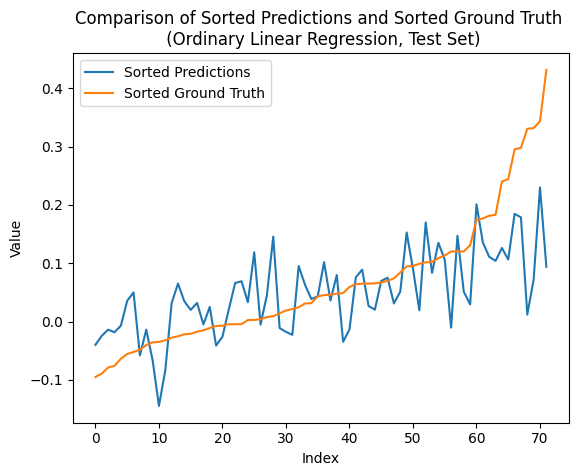

In [9]:
plot_comparison(y_test, y_pred, 'Ordinary Linear Regression, Test Set')

In [10]:
# predict on train
# Use the trained model to make predictions
y_pred_ = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

Mean squared error: 0.0061596970599993445
Correlation coefficient: 0.6571303587882936


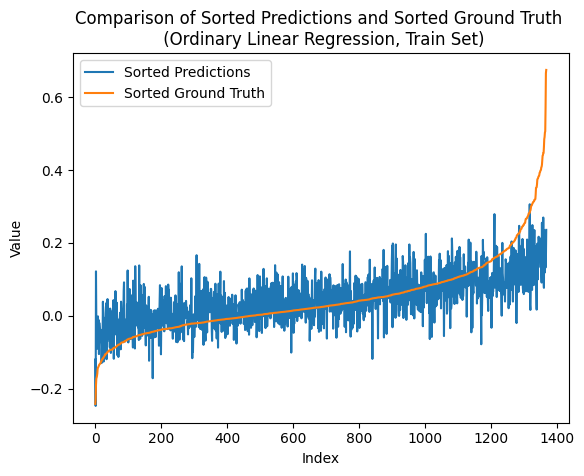

In [11]:
plot_comparison(y_train, y_pred_, 'Ordinary Linear Regression, Train Set')

#### Ridge linear regression

Linear least squares with l2 regularization.

Minimizes the objective function:

$$
||y - Xw||^2_2 + \alpha  ||w||^2_2
$$

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm.

##### Fit and predict

In [12]:
# Create a Ridge Regression object
ridge_model = linear_model.Ridge(alpha=1.0)  # You can adjust the value of alpha as per your requirements

# Fit the model on the training data
ridge_model.fit(x_train, y_train)

# Print the fitted coefficients
print("Fitted Coefficients:", ridge_model.coef_)

# Print the fitted intercept
print("Fitted Intercept:", ridge_model.intercept_)

# Predict on the test data
y_pred = ridge_model.predict(x_test)

Fitted Coefficients: [ 0.00849453  0.00740115  0.00016157 -0.0020944   0.0034469   0.00444959
  0.00196809  0.0228857   0.0024516  -0.00571464 -0.00091334  0.0277737
  0.00929144 -0.00475298  0.00350069  0.00617136 -0.00020173  0.02975458
 -0.00172438  0.01062452 -0.02926797 -0.00329156  0.01071774 -0.01549336
 -0.06836985]
Fitted Intercept: -0.003992042396819981


##### Evaluate

Mean squared error: 0.008058648873285792
Correlation coefficient: 0.6047541953182045


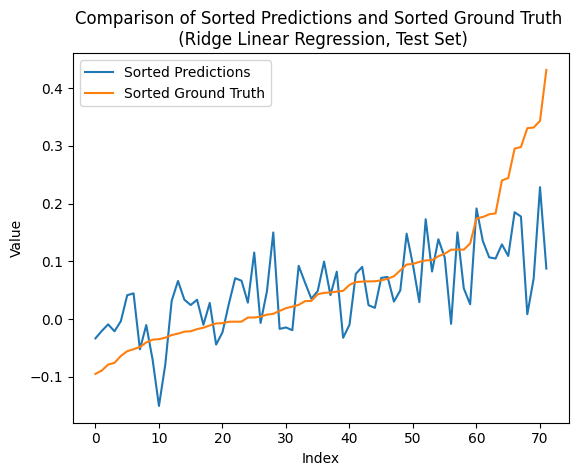

In [13]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

plot_comparison(y_test, y_pred, 'Ridge Linear Regression, Test Set')

Mean squared error: 0.00617267529320373
Correlation coefficient: 0.6562194390940245


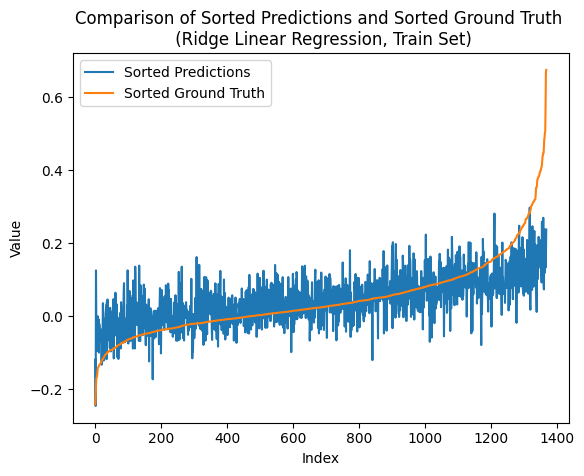

In [14]:
# predict on train
# Use the trained model to make predictions
y_pred_ = ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

plot_comparison(y_train, y_pred_, 'Ridge Linear Regression, Train Set')

#### ElasticNet linear regression

Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function:

$$
1 / (2 * n_{samples}) * ||y - Xw||^2_2
+ \alpha * l1_{ratio} * ||w||_1
+ 0.5 * \alpha * (1 - l1_{ratio}) * ||w||^2_2
$$

If controlling the L1 and L2 penalty separately, that this is equivalent to:

$$
a * ||w||_1 + 0.5 * b * ||w||_2^2
$$

where: $\alpha = a + b$ and $l1_{ratio} = a / (a + b)$.

##### Fit and predict

In [15]:
# Create an ElasticNet object
a = 0.004; b = 0.00
alpha = a + b; l1_ratio = a / (a + b)
elasticnet_model = linear_model.ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=100000)
# adjust the values of alpha and l1_ratio as per your requirements

# Fit the model on the training data
elasticnet_model.fit(x_train, y_train)

# Print the fitted coefficients
print("Fitted Coefficients:", elasticnet_model.coef_)

# Print the fitted intercept
print("Fitted Intercept:", elasticnet_model.intercept_)

# Predict on the test data
y_pred = elasticnet_model.predict(x_test)

# It is normal to encounter warning here, because our data is not linear enough
# and not normailized to guarantee a low error/residual, even though we set a very
# large max_iter. But the results is similar to that of ordinary and Ridge linear
# regression. Like alpha = 0 results in the same results as the ordinary linear
# rergession.

Fitted Coefficients: [ 0.00951724  0.0068485   0.         -0.          0.00285676  0.
  0.          0.01545406  0.00635406 -0.          0.          0.02601547
  0.00529342 -0.          0.          0.00326147  0.          0.
  0.          0.         -0.          0.          0.         -0.
 -0.        ]
Fitted Intercept: -0.004587622786060119


##### Evaluate

Mean squared error: 0.008246618904776503
Correlation coefficient: 0.593481482809575


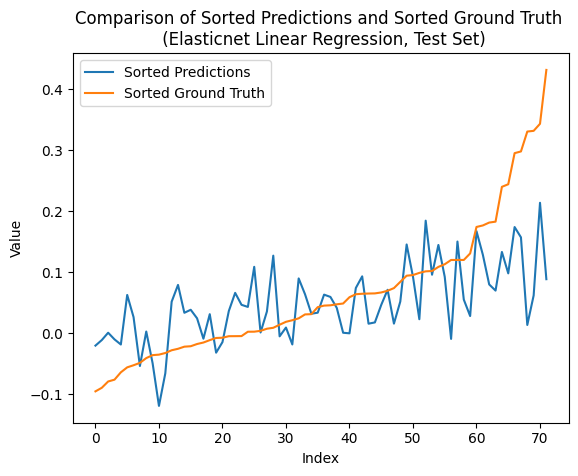

In [16]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

plot_comparison(y_test, y_pred, 'Elasticnet Linear Regression, Test Set')

Mean squared error: 0.006385274236585692
Correlation coefficient: 0.6428087118878939


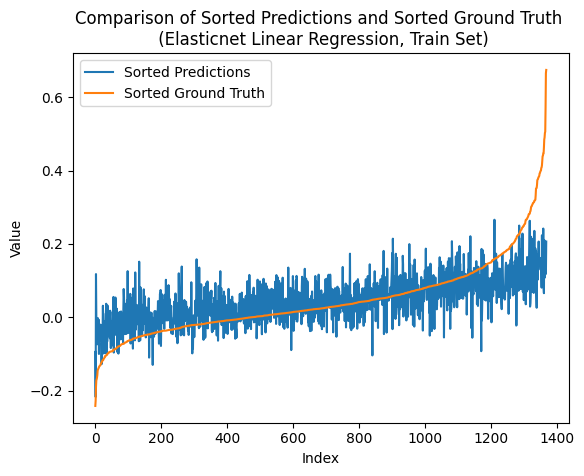

In [17]:
# predict on train
# Use the trained model to make predictions
y_pred_ = elasticnet_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

plot_comparison(y_train, y_pred_, 'Elasticnet Linear Regression, Train Set')

### Power-law regression

Mathematically, a power-law relationship can be expressed as:

$$
y = A  X^C
$$

Here, I modify it, shown as:

$$
y = A  (X+B)^C + D
$$

where, $X = \beta_1 x_1 + \beta_2 x_2 \dots + \beta_N x_N$. $X+D$ is a linear regression part. $A$, $B$, $C$, $D$, $\beta_1$, $\beta_2$, ...,$\beta_N$ are parameters to be determined.

#### Divide train and val datasets

In [18]:
# independent data
x = group_satcked_green

# dependent data (labels/targets)
y = np.squeeze(stacked_red)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1368, 25)
y_train shape: (1368,)
x_test shape: (72, 25)
y_test shape: (72,)


#### Fit, predict and evaluate (Example 1)

Fitted Parameters: [ 3.63589934e+00  5.17800351e-01 -1.38641935e-01  4.83492282e-03
  4.37660663e-03 -3.27563273e-04 -1.65395632e-05  2.76270197e-03
  3.60564181e-03  1.18571822e-03  1.39874639e-02  9.74478013e-04
 -4.33905140e-03  3.12368809e-04  1.63689641e-02  5.70510078e-03
 -3.84107281e-03  9.86178700e-04  3.44528993e-03  1.88010948e-04
  1.79227711e-02 -6.87188789e-03  6.36542080e-03 -1.91319680e-02
 -5.91287026e-04  3.77753461e-02 -1.06618770e-02 -1.74782336e-01]


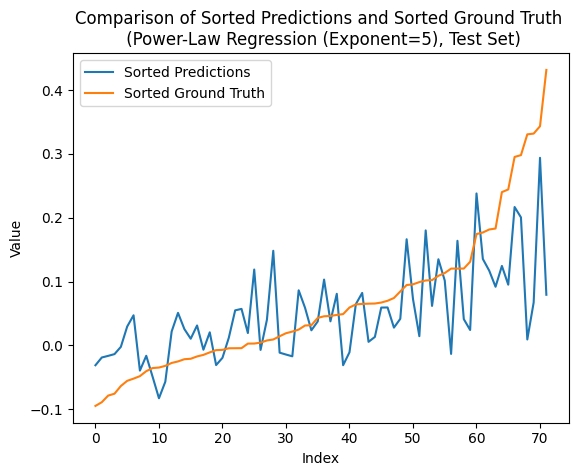

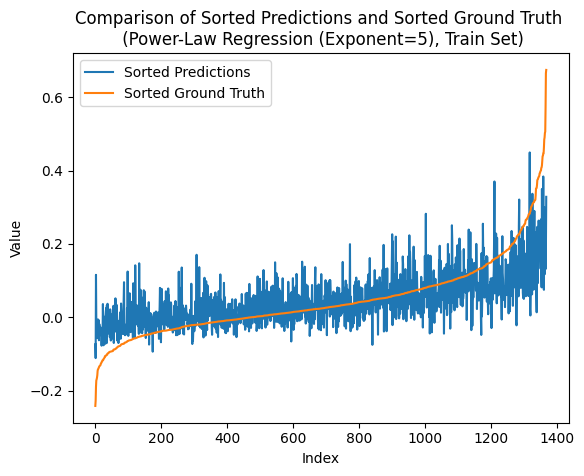

In [19]:
exponent = 5
# Define the model function
def func(X, *params):
    A, B, D = params[:3]
    # Compute the weighted sum
    weighted_sum = np.sum(X * np.array(params[3:]), axis=1)
    base = weighted_sum + B
    power_result = np.power(base, exponent)
    return A * power_result + D

# Create a LinearRegression object
model = linear_model.LinearRegression()

# give the initial params using linear regression
# so that the params are within a reasonable range
model.fit(x_train, y_train)
# print("Fitted Coefficients:", model.coef_)
# print("Fitted Intercept:", model.intercept_)
num_features = x_train.shape[1]
# Assuming model.coef_ is the np array containing the coefficients
model_coefs = model.coef_
# Set negative elements to 0 using np.clip()
initial_params = [1, model.intercept_, 0] + list(model_coefs) # Initial parameter guesses
# model_coefs_clipped = np.clip(model_coefs, 0, np.inf)
# initial_params = [1, model.intercept_, 0] + list(model_coefs_clipped) # Initial parameter guesses

# Set lower and upper bounds for the parameters
lower_bounds = [0, -np.inf, -np.inf] + [0] * num_features
upper_bounds = [np.inf, np.inf, np.inf] + [np.inf] * num_features

# Combine the lower and upper bounds into a 2-tuple of array_like
bounds = (lower_bounds, upper_bounds)

# Perform the curve fit with bounds
params, params_covariance = curve_fit(func, x_train, y_train, p0=initial_params, maxfev=1000000)
# params, params_covariance = curve_fit(func, x_train, y_train, p0=initial_params, bounds=bounds, maxfev=1000000)

# Print the fitted parameters
print("Fitted Parameters:", params)

# predict on test
A, B, D = params[:3]
weighted_sum = np.sum(x_test * np.array(params[3:]), axis=1)
base = weighted_sum + B
abs_base = np.abs(base)
sign = np.sign(base)
power_result = np.power(abs_base, exponent)
y_pred = A * sign * power_result + D

plot_comparison(y_test, y_pred, 'Power-Law Regression (Exponent=5), Test Set')

# predict on train
A, B, D = params[:3]
weighted_sum = np.sum(x_train * np.array(params[3:]), axis=1)
base = weighted_sum + B
abs_base = np.abs(base)
sign = np.sign(base)
power_result = np.power(abs_base, exponent)
y_pred_ = A * sign * power_result + D

plot_comparison(y_train, y_pred_, 'Power-Law Regression (Exponent=5), Train Set')

#### Fit, predict and evaluate (Example 2)

Fitted Coefficients: [ 8.28301566e-03  7.56874223e-03  2.17645374e-04 -2.06269935e-03
  3.53903502e-03  5.16754189e-03  1.24691680e-03  2.32002780e-02
  2.40241470e-03 -6.16858257e-03 -1.20710729e-03  2.78029746e-02
  9.57603350e-03 -4.35972960e-03  3.04637298e-03  6.77257749e-03
  8.29508492e-04  3.04802829e-02 -6.67335217e-04  9.61650591e-03
 -2.47112388e-02 -1.14696165e-03  8.29246943e-02 -1.13145597e-02
 -3.19379843e-01]
Fitted Intercept: -0.003966473464240797
Fitted Parameters: [3.25257946e+02 3.78028413e-02]


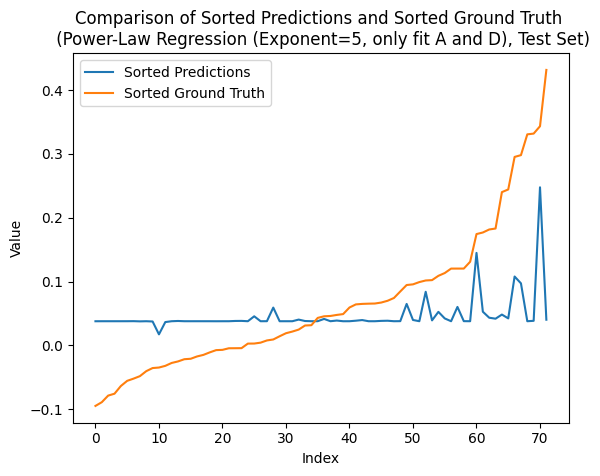

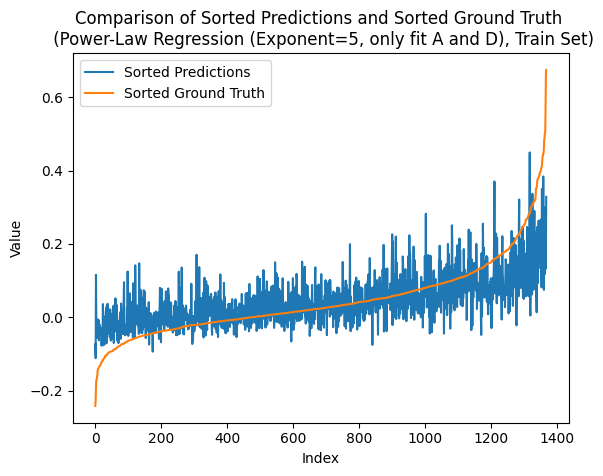

In [20]:
# compared with example 1, here only fit A and D.

exponent = 5

model = linear_model.LinearRegression()
model.fit(x_train, y_train)
# now we have: model.intercept_ and model.coef_
# Print the fitted coefficients
print("Fitted Coefficients:", model.coef_)
# Print the fitted intercept
print("Fitted Intercept:", model.intercept_)

# Define the model function
def func(X, A, D):
    # Compute the weighted sum
    weighted_sum = np.sum(X * np.array(model.coef_), axis=1)
    base = weighted_sum + model.intercept_
    power_result = np.power(base, exponent)
    return A * power_result + D

initial_params = [1, 0]

# Perform the curve fit
params, params_covariance = curve_fit(func, x_train, y_train, p0=initial_params, maxfev=1000000)

# Print the fitted parameters
print("Fitted Parameters:", params)


# predict on test
A, D = params
y_pred = func(x_test, A, D)

plot_comparison(y_test, y_pred, 'Power-Law Regression (Exponent=5, only fit A and D), Test Set')


# predict on train
A, D = params
y_pred = func(x_train, A, D)

plot_comparison(y_train, y_pred_, 'Power-Law Regression (Exponent=5, only fit A and D), Train Set')

#### Fit and predict

163/97
392/53
254/11


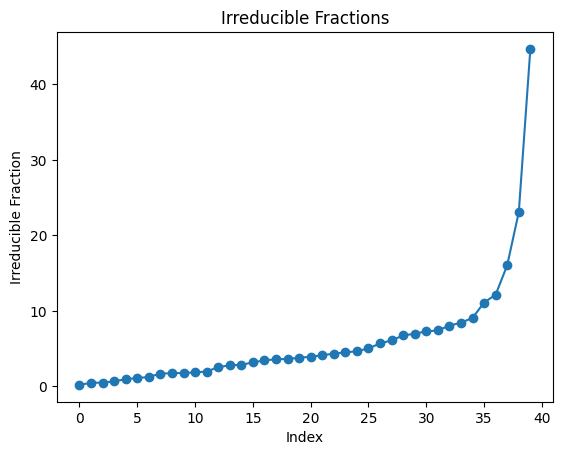

In [21]:
# generate irreducible fraction with an odd number as the denominator
# such numbers can work as the exponent for negative numbers and
# will be used as the parameter "C" in Power-law regression below:
# y = A * (B+b1*x1+b2*x2+...+bN*xN)**C + D

def gcd(a, b): # calculate the greatest common divisor of two numbers
    while b:
        a, b = b, a % b
    return a

def generate_irreducible_fraction(existing_fractions = []):
    while True:
        numerator = random.randint(1, 400)  # Random numerator
        denominator = random.randrange(1, 100, 2)  # Random odd denominator
        if gcd(numerator, denominator) == 1:  # Check if the fraction is irreducible
            fraction = (numerator, denominator)
            if fraction not in existing_fractions:  # Check if the fraction is not a duplicate
                return fraction

# Generate irreducible fraction numbers
N_faction = 40
upper_bound = 50
irreducible_fractions = []
while len(irreducible_fractions) < N_faction:
    fraction = generate_irreducible_fraction(irreducible_fractions)
    if fraction[0]/fraction[1] < upper_bound:
        irreducible_fractions.append(fraction)

# Sort the irreducible fractions
irreducible_fractions.sort(key=lambda f: f[0] / f[1])

# Print the irreducible fraction numbers
for numerator, denominator in irreducible_fractions:
    if random.random() <= 0.1:
        print(f"{numerator}/{denominator}")


# Extract the numerator and denominator values
indexes = range(1, len(irreducible_fractions) + 1)
values = [numerator / denominator for numerator, denominator in irreducible_fractions]

# Plot the irreducible fractions
plt.plot(values, 'o-')
plt.xlabel("Index")
plt.ylabel("Irreducible Fraction")
plt.title("Irreducible Fractions")
plt.show()

In [22]:
# # old code! The new one is in the next chunk.

# params_list = []
# for numerator, denominator in irreducible_fractions:
#     C1, C2 = numerator, denominator

#     # Define the model function
#     def func(X, *params):
#         A, B, D = params[:3]
#         # Compute the weighted sum
#         weighted_sum = np.sum(X * np.array(params[3:]), axis=1)
#         base = weighted_sum + B
#         abs_base = np.abs(base)
#         sign = np.sign(base)
#         power_result = np.power(abs_base, C1 / C2)
#         return A * sign * power_result + D

#     # Create a LinearRegression object
#     model = linear_model.LinearRegression()

#     # give the initial params using linear regression
#     # so that the params are within a reasonable range
#     model.fit(x_train, y_train)
#     # print("Fitted Coefficients:", model.coef_)
#     # print("Fitted Intercept:", model.intercept_)
#     num_features = x_train.shape[1]
#     initial_params = [1, model.intercept_, 0] + list(model.coef_) # Initial parameter guesses

#     # Perform the curve fit
#     params, params_covariance = curve_fit(func, x_train, y_train, p0=initial_params, maxfev=1000000)
#     params_list.append(params)

#     # Print the fitted parameters
#     # print("Fitted Parameters:", params)

# # predict on test
# y_predict_test_list = []
# for (numerator, denominator), params in zip(irreducible_fractions, params_list):
#     C1, C2 = numerator, denominator
#     A, B, D = params[:3]
#     weighted_sum = np.sum(x_test * np.array(params[3:]), axis=1)
#     base = weighted_sum + B
#     abs_base = np.abs(base)
#     sign = np.sign(base)
#     power_result = np.power(abs_base, C1 / C2)
#     y_pred = A * sign * power_result + D
#     y_predict_test_list.append(y_pred)

# # predict on train
# y_predict_train_list = []
# for (numerator, denominator), params in zip(irreducible_fractions, params_list):
#     C1, C2 = numerator, denominator
#     A, B, D = params[:3]
#     weighted_sum = np.sum(x_train * np.array(params[3:]), axis=1)
#     base = weighted_sum + B
#     abs_base = np.abs(base)
#     sign = np.sign(base)
#     power_result = np.power(abs_base, C1 / C2)
#     y_pred_ = A * sign * power_result + D
#     y_predict_train_list.append(y_pred_)

In [23]:
# new code, a updated version for the code in last chunk.
# input and output data normalization is achieved (but it
# seems normalization is redundant).

class CurveFit_with_Normalization:
    def __init__(self, exponent_numerator=1, exponent_denominator=1, input_range=[1,2], output_range=[1,2]):
        self.input_min = input_range[0]
        self.input_max = input_range[1]
        self.output_min = output_range[0]
        self.output_max = output_range[1]
        self.input_scale = None
        self.input_shift = None
        self.output_scale = None
        self.output_shift = None
        self.exponent_numerator = exponent_numerator
        self.exponent_denominator = exponent_denominator
        self.linear_model = linear_model.LinearRegression()

    def fit(self, X, y):
        # Normalize the input and output data
        self.input_scale = (self.input_max - self.input_min) / (np.max(X) - np.min(X))
        self.input_shift = self.input_min - np.min(X) * self.input_scale
        normalized_X = self.input_scale * X + self.input_shift

        self.output_scale = (self.output_max - self.output_min) / (np.max(y) - np.min(y))
        self.output_shift = self.output_min - np.min(y) * self.output_scale
        normalized_y = self.output_scale * y + self.output_shift

        def normalized_func_(X_normalize, *params):
            A, B, D = params[:3]
            # Compute the weighted sum
            weighted_sum = np.sum(X_normalize * np.array(params[3:]), axis=1)
            base = weighted_sum + B
            abs_base = np.abs(base)
            sign = np.sign(base)
            power_result = np.power(abs_base, self.exponent_numerator / self.exponent_denominator)
            return A * sign * power_result + D

        # Give the initial params using linear regression
        self.linear_model.fit(normalized_X, normalized_y)
        # print("Fitted Coefficients:", linear_model.coef_)
        # print("Fitted Intercept:", linear_model.intercept_)
        # num_features = X.shape[1]
        exponent = self.exponent_numerator / self.exponent_denominator
        initial_params = [1, self.linear_model.intercept_ / exponent + (1 - 1 / exponent), 0] + list(self.linear_model.coef_ /
                        exponent)  # Initial parameter guesses
        # initial_params = [1, 0, 0] + [1 / X.shape[1]] * (X.shape[1])

        # Perform the normalized curve fit
        normalized_params, params_covariance = curve_fit(normalized_func_, normalized_X, normalized_y,
                                  p0=initial_params, maxfev=100000000)

        # Store the fitted parameters
        self.normalized_fitted_params = normalized_params

    def predict(self, X):
        # Normalize the input data using the previously calculated scaling and shifting parameters
        normalized_X = self.input_scale * X + self.input_shift

        # Make predictions using the denormalized parameters
        y_pred = self.normalized_func(normalized_X, self.exponent_numerator,
                              self.exponent_denominator, *self.normalized_fitted_params)

        # Denormalize the predicted output
        y_pred = (y_pred - self.output_shift) / self.output_scale

        return y_pred

    @staticmethod
    def normalized_func(X_normalize, exponent_numerator, exponent_denominator, *params):
        A, B, D = params[:3]
        # Compute the weighted sum
        weighted_sum = np.sum(X_normalize * np.array(params[3:]), axis=1)
        base = weighted_sum + B
        abs_base = np.abs(base)
        sign = np.sign(base)
        power_result = np.power(abs_base, exponent_numerator / exponent_denominator)
        return A * sign * power_result + D

model_list = []
for numerator, denominator in irreducible_fractions:
    # Create an instance of NormalizedCurveFit
    model = CurveFit_with_Normalization(numerator, denominator, input_range=[1, 2], output_range=[1, 2])

    # Fit the model to your input and output data
    model.fit(x_train, y_train)

    model_list.append(model)


In [24]:
# this is for the new version code in the last chunk

# predict on test
y_predict_test_list = []
for model in model_list:
    y_pred = model.predict(x_test)
    # print(type(y_pred))
    y_predict_test_list.append(y_pred)

# predict on train
y_predict_train_list = []
for model in model_list:
    y_pred_ = model.predict(x_train)
    # print(type(y_pred_))
    y_predict_train_list.append(y_pred_)

In [25]:
# for model in model_list:
#     print(model.exponent_numerator, model.exponent_denominator)

#### Evaluate

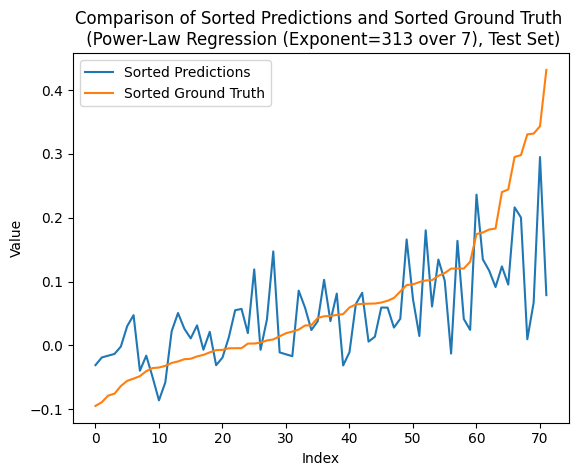

0.02423236290970778


In [26]:
# both the old and new versions (in the last subsection "Fit and predict") of code
# share the same evaluate code in this subsectoon.

# Create and update multiple figures (test)
for y_pred, (numerator, denominator) in zip(y_predict_test_list, irreducible_fractions):
    plot_comparison(y_test, y_pred, f'Power-Law Regression (Exponent={numerator} over {denominator}), Test Set')
    # here pay attention: cannot use / replace over in the name, otherwise cannot save the fig
    # because / cannot be in a file name.
    print(y_pred[0])
    clear_output(wait=True)  # Clear the previous output

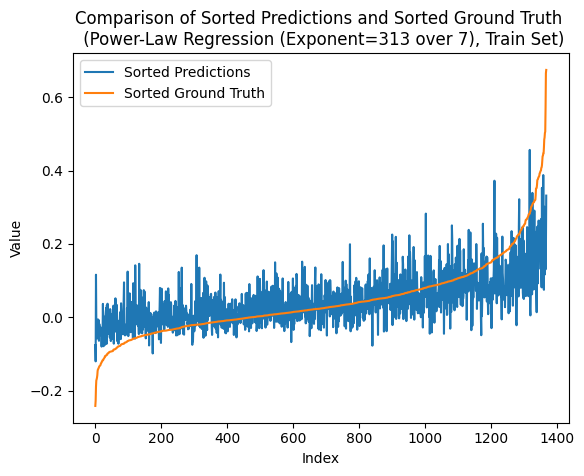

0.08988739531761578


In [27]:
# Create and update multiple figures (train)
for y_pred_, (numerator, denominator) in zip(y_predict_train_list, irreducible_fractions):
    plot_comparison(y_train, y_pred_, f'Power-Law Regression (Exponent={numerator} over {denominator}), Train Set')
    print(y_pred_[0])
    clear_output(wait=True)  # Clear the previous output

### Exponential regression

Let $B = (b_1, b_2, \ldots , b_N)$.
$$
y = A \cdot e^{(b_1 \cdot x_1 + \ldots + b_N \cdot x_N)} + C
$$

#### Divide train and val datasets

In [28]:
# independent data
x = group_satcked_green

# dependent data (labels/targets)
y = np.squeeze(stacked_red)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1368, 25)
y_train shape: (1368,)
x_test shape: (72, 25)
y_test shape: (72,)


#### Fit and predict

In [29]:
# Define the model function
def func(X, *params):
    A, C = params[:2]
    return A * np.exp(np.sum(X * np.array(params[2:]), axis=1)) + C

# give the initial params using linear regression
# so that the params are within a reasonable range
num_features = x_train.shape[1]
initial_params = [np.mean(y_train), 0] + [0] * num_features # Initial parameter guesses

# Perform the curve fit
params, params_covariance = curve_fit(func, x_train, y_train, p0=initial_params, maxfev=1000000)

# Print the fitted parameters
print("Fitted Parameters:", params)

# predict on test
A, C = params[:2]
y_pred = A * np.exp(np.sum(x_test * np.array(params[2:]), axis=1)) + C

# predict on train
A, C = params[:2]
y_pred_ = A * np.exp(np.sum(x_train * np.array(params[2:]), axis=1)) + C

Fitted Parameters: [ 1.87123029e-01 -1.90080285e-01  3.40033178e-02  3.05772821e-02
 -2.49194815e-03  4.85530544e-05  1.95783707e-02  2.48969634e-02
  8.90102191e-03  9.83075781e-02  6.65559330e-03 -3.03907795e-02
  1.30905974e-03  1.15904357e-01  4.00205951e-02 -2.72080362e-02
  6.22504795e-03  2.48130071e-02  3.73831850e-04  1.26144436e-01
 -4.97544159e-02  4.56011391e-02 -1.34034892e-01 -3.74403443e-03
  2.63216376e-01 -7.38379867e-02 -1.21397447e+00]


#### Evaluate

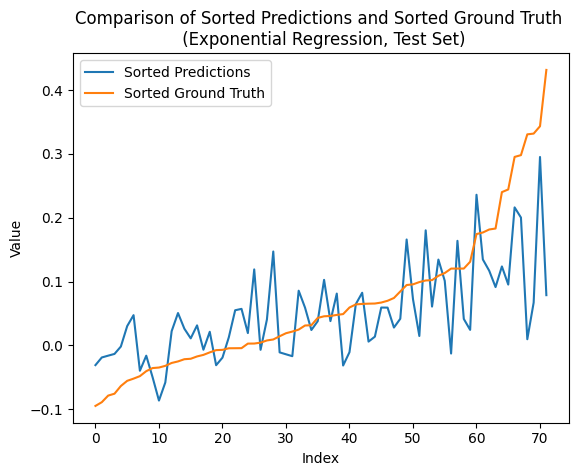

In [30]:
plot_comparison(y_test, y_pred, 'Exponential Regression, Test Set')

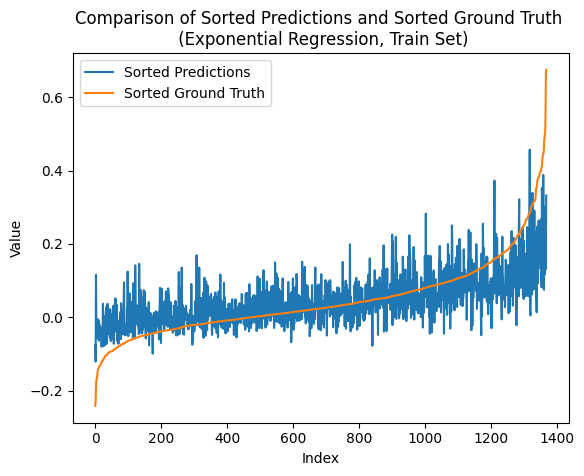

In [31]:
plot_comparison(y_train, y_pred_, 'Exponential Regression, Train Set')

### Logistic regression

#### Divide train and val datasets

In [78]:
# independent data
x = group_satcked_green

class_num = 16

# dependent data (labels/targets)
y = np.squeeze(stacked_red)
# print(np.max(y), np.min(y))
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max
# Generate class_num+1 evenly spaced intervals
intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
# print(intervals)

# Digitize the array to get the indices of the intervals
y_digital = np.digitize(y, intervals) - 1
# print(max(y_digital))
# print(min(y_digital))
# print(y_digital.shape, y.shape)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_digital, test_size=0.05, random_state=42)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# to see unique elements (guarantee we have all 0, 1,..., class_num-1 classes)
unique_elements = np.unique(y_train)
print("Unique elements:", unique_elements)
print("Number of unique elements:", len(unique_elements))


x_train shape: (1368, 25)
y_train shape: (1368,)
x_test shape: (72, 25)
y_test shape: (72,)
Unique elements: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Number of unique elements: 16


#### Fit and predict

In [52]:
# fit
model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
# model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='ovr')

fit_result = model.fit(x_train, y_train)
print(fit_result.intercept_.shape, fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

print('y_prob.shape:', y_prob.shape)
print(np.sum(y_prob, axis = 1))
print(y_prob[0,:])

# Print the predicted class labels
print('y_pred:', y_pred)
print('y_test:', y_test)
print('y_pred shape:', y_pred.shape, 'y_test shape:', y_test.shape)
# Print the predicted probabilities
# print(y_prob)

(16,) (16, 25)
Coefficients: [-6.13912917e-01 -1.26726869e+00 -2.02260109e-01 -1.02977679e+00
 -4.15400307e-01  7.29576963e-01 -2.05979762e-01 -8.51394073e-01
 -5.86081195e-04  8.23697880e-01 -9.35671033e-03 -3.28445695e-01
 -3.96048548e-01 -4.01653496e-01 -7.31450851e-01  6.56886667e-01
 -5.03821664e-01 -4.21738923e-01 -2.49680441e-03 -1.46942717e-01
  6.80839000e-02 -6.74293410e-02  7.15498586e-02 -1.20319571e-01
  3.58775094e-02]
Intercept: -1.1677418896069978
--- --- ---
y_prob.shape: (72, 16)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.43076514e-05 2.50543663e-02 3.88692769e-02 2.78475716e-01
 3.67533850e-01 2.02009253e-01 6.18429628e-02 1.30307846e-02
 1.04675630e-02 5.42584390e-04 1.11613949e-03 5.83713205e-04
 2.95709233e-04 1.68131160e-05 1.38002753e-04 8.95683833e-06]
y_pred: [ 4  7  6  5  4 12  3  5

#### Evaluate

Accuracy: 0.3055555555555556
Confusion Matrix:
[[ 0  2  2  0  0  0  0  0  0  0  0]
 [ 1  3 10  0  0  0  0  0  0  0  0]
 [ 0  2 13  1  1  1  0  0  0  0  0]
 [ 0  2  9  4  1  0  0  1  0  0  0]
 [ 0  0  3  3  1  0  0  0  0  0  0]
 [ 0  0  1  2  0  0  0  0  0  0  1]
 [ 0  0  0  1  1  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
Correlation coefficient: 0.47198973344177797


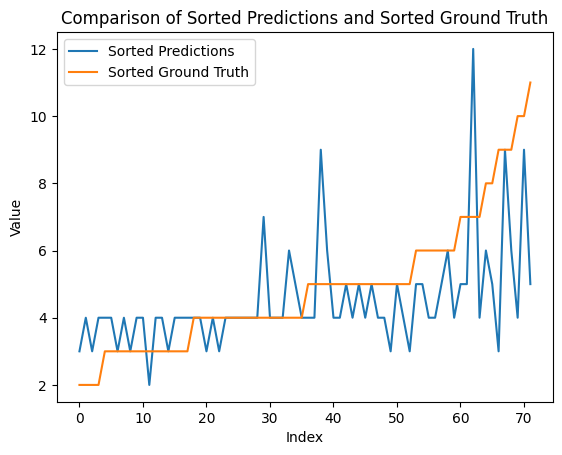

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:") # y_test doesn't include all classes, so confusion matrix is less than num_class by num_class
print(cm)
# the columns represent the predicted labels (predictions)
# the rows represent the true labels (ground truth)
#                Predicted Class
#           |   Class 1   |   Class 2   |   Class 3   |
# -----------------------------------------------------
# True Class   |     TP1     |     FN1     |     FN1     |
# -----------------------------------------------------
# True Class   |     FP2     |     TP2     |     FN2     |
# -----------------------------------------------------
# True Class   |     FN3     |     FP3     |     TP3     |

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)


# Sort y_pred and y_test based on y_test
sorted_indices = np.argsort(y_test)
sorted_y_pred = y_pred[sorted_indices]
sorted_y_test = y_test[sorted_indices]
# Plot sorted_y_pred and sorted_y_test
plt.plot(sorted_y_pred, label='Sorted Predictions')
plt.plot(sorted_y_test, label='Sorted Ground Truth')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Sorted Predictions and Sorted Ground Truth')
plt.legend()
plt.show()

Accuracy: 0.4269005847953216
Confusion Matrix:
[[  0   0   2   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   7   5   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  18  26  28   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   6  95 157  14   2   2   0   0   1   0   0   0   0   0]
 [  0   0   5  60 347  46   3   2   0   0   0   0   0   0   0   0]
 [  0   0   2   9 143  81   9   7   3   4   0   0   0   0   0   0]
 [  0   0   1   2  49  44  16   4   1   4   1   0   0   0   0   0]
 [  0   0   0   0  27  23   7   9   0   1   1   0   0   0   0   0]
 [  0   0   0   0   8  15   5   1   5   0   0   1   0   0   0   0]
 [  0   0   0   0   6   5   2   2   2   6   0   0   0   0   0   0]
 [  0   0   0   1   0   4   4   1   0   0   2   0   0   0   0   0]
 [  0   0   0   0   1   5   1   1   1   0   0   2   0   0   0   0]
 [  0   0   0   0   1   2   1   0   1   0   0   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  

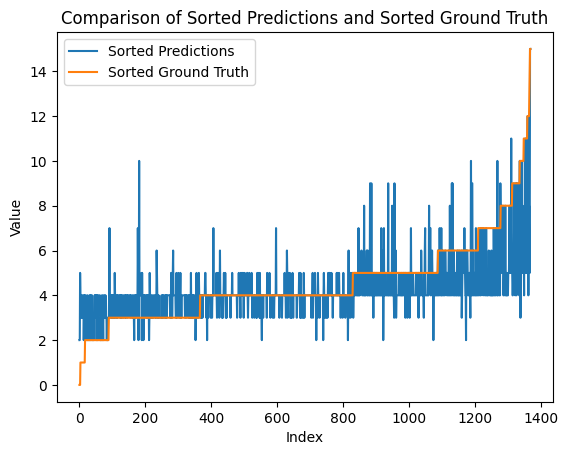

In [54]:
# predict on train
# Use the trained model to make predictions
y_pred_ = model.predict(x_train)
# Alternatively, you can get the predicted probabilities for each class
y_prob_ = model.predict_proba(x_train)

accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_train, y_pred_)
print("Confusion Matrix:")
print(cm)
# the columns represent the predicted labels (predictions)
# the rows represent the true labels (ground truth)
#                Predicted Class
#              |   Class 1   |   Class 2   |   Class 3   |
# -----------------------------------------------------
# True Class   |     TP1     |     FN1     |     FN1     |
# -----------------------------------------------------
# True Class   |     FP2     |     TP2     |     FN2     |
# -----------------------------------------------------
# True Class   |     FN3     |     FP3     |     TP3     |

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)


# Sort y_pred and y_train based on y_train
sorted_indices = np.argsort(y_train)
sorted_y_pred_ = y_pred_[sorted_indices]
sorted_y_train = y_train[sorted_indices]
# Plot sorted_y_pred and sorted_y_test
plt.plot(sorted_y_pred_, label='Sorted Predictions')
plt.plot(sorted_y_train, label='Sorted Ground Truth')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Sorted Predictions and Sorted Ground Truth')
plt.legend()
plt.show()

#### Fit and predict (balanced weights)

In [79]:
# fit
model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, class_weight='balanced', multi_class='multinomial')
fit_result = model.fit(x_train, y_train)
print(fit_result.intercept_.shape, fit_result.coef_.shape)

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)
# Print the predicted class labels
print(y_pred, y_test)
print(y_pred.shape, y_test.shape)
# Print the predicted probabilities
# print(y_prob)

(16,) (16, 25)
[ 1 12  9  7 12 12  3  8  7  9  3  7  1  3  2  2  0 11  7  3  4  8  3  7
  4  5  8  5 10 11  3  4 11  2  6  2  9  5  8  3  3  5  2  9  4  3  9  9
  0  3  3  2  2  4  3  7  6  1  9  1  4  3  4  3  6  3  4 10  6  1  6  6] [ 6  4  8 11  4  7  3  6  5  9  5  6  2  5  3  2  3  4  8  9  4  7  4  5
  3  5  4  4  3  6  5  4  6  4  3  3 10  5  4  4  4  4 10  4  4  4  5  9
  3  5  3  5  3  5  5  7  6  3  5  2  6  3  4  3  5  4  2  7  5  3  5  5]
(72,) (72,)


#### Evaluate (balanced weights)

Accuracy: 0.20833333333333334
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 1 0 0 0 0 0 0 0 0]
 [2 2 3 4 1 0 1 0 0 0 1 0 0]
 [0 0 1 5 4 2 0 0 2 1 0 1 2]
 [0 0 1 5 1 2 4 2 0 2 0 0 0]
 [0 1 0 0 1 0 1 1 1 0 0 2 0]
 [0 0 0 0 0 0 0 1 1 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 2 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]
Correlation coefficient: 0.41741570111243875


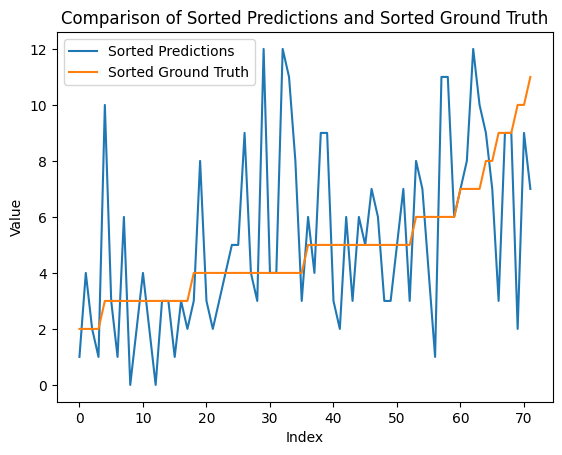

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# the columns represent the predicted labels (predictions)
# the rows represent the true labels (ground truth)
#                Predicted Class
#           |   Class 1   |   Class 2   |   Class 3   |
# -----------------------------------------------------
# True Class   |     TP1     |     FN1     |     FN1     |
# -----------------------------------------------------
# True Class   |     FP2     |     TP2     |     FN2     |
# -----------------------------------------------------
# True Class   |     FN3     |     FP3     |     TP3     |

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)


# Sort y_pred and y_test based on y_test
sorted_indices = np.argsort(y_test)
sorted_y_pred = y_pred[sorted_indices]
sorted_y_test = y_test[sorted_indices]
# Plot sorted_y_pred and sorted_y_test
plt.plot(sorted_y_pred, label='Sorted Predictions')
plt.plot(sorted_y_test, label='Sorted Ground Truth')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Sorted Predictions and Sorted Ground Truth')
plt.legend()
plt.show()

Accuracy: 0.28289473684210525
Confusion Matrix:
[[  3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  11   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  12  41  12   5   0   0   1   1   0   0   0   0   0   0   0]
 [  5  50  50  90  33  15   8  10   1   1   6   2   4   2   0   0]
 [  8  40  57  75 112  37  38  37  20   5  17   9   6   2   0   0]
 [  2  12  14  15  31  33  27  44  18  15  18  19   6   2   1   1]
 [  1   3   2   0  10  13  23  22   9  11  12  10   4   0   1   1]
 [  0   0   2   1   3   4   7  27   4   3   6   7   4   0   0   0]
 [  0   0   0   0   3   2   3   5  13   4   3   1   1   0   0   0]
 [  0   0   1   0   1   0   0   0   0  11   4   4   1   1   0   0]
 [  0   0   0   1   0   0   0   0   0   1   8   1   1   0   0   0]
 [  0   0   0   0   0   0   1   1   0   1   3   5   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0 

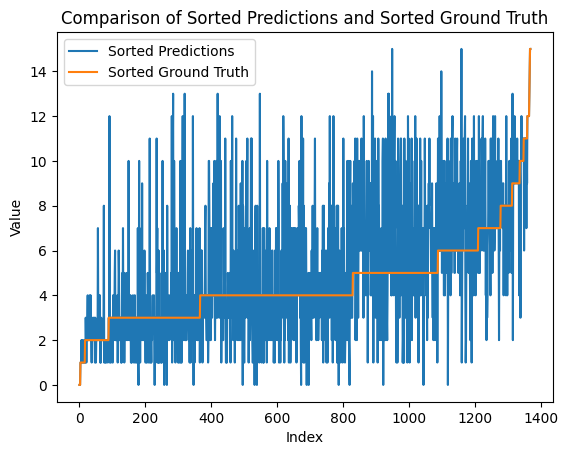

In [81]:
# predict on train
# Use the trained model to make predictions
y_pred_ = model.predict(x_train)
# Alternatively, you can get the predicted probabilities for each class
y_prob_ = model.predict_proba(x_train)

accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_train, y_pred_)
print("Confusion Matrix:")
print(cm)
# the columns represent the predicted labels (predictions)
# the rows represent the true labels (ground truth)
#                Predicted Class
#              |   Class 1   |   Class 2   |   Class 3   |
# -----------------------------------------------------
# True Class   |     TP1     |     FN1     |     FN1     |
# -----------------------------------------------------
# True Class   |     FP2     |     TP2     |     FN2     |
# -----------------------------------------------------
# True Class   |     FN3     |     FP3     |     TP3     |

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)


# Sort y_pred and y_train based on y_train
sorted_indices = np.argsort(y_train)
sorted_y_pred_ = y_pred_[sorted_indices]
sorted_y_train = y_train[sorted_indices]
# Plot sorted_y_pred and sorted_y_test
plt.plot(sorted_y_pred_, label='Sorted Predictions')
plt.plot(sorted_y_train, label='Sorted Ground Truth')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Sorted Predictions and Sorted Ground Truth')
plt.legend()
plt.show()

# Example code

## Functions

In [58]:
def check_duplicates(arrays):
    flattened_array = np.concatenate(arrays)
    unique_elements, counts = np.unique(flattened_array, return_counts=True)
    duplicate_elements = unique_elements[counts > 1]

    if len(duplicate_elements) > 0:
        print("Duplicate numbers found:", duplicate_elements)
        return duplicate_elements
    else:
        print("No duplicate numbers found.")
        return None

# example of using the function
arrays = arrays = [
    np.array([36, 52, 69, 71, 74, 88, 115]),
    np.array([18, 19, 20, 21, 22, 23, 24, 25, 74]),
]
duplicate_numbers = check_duplicates(arrays)

Duplicate numbers found: [74]


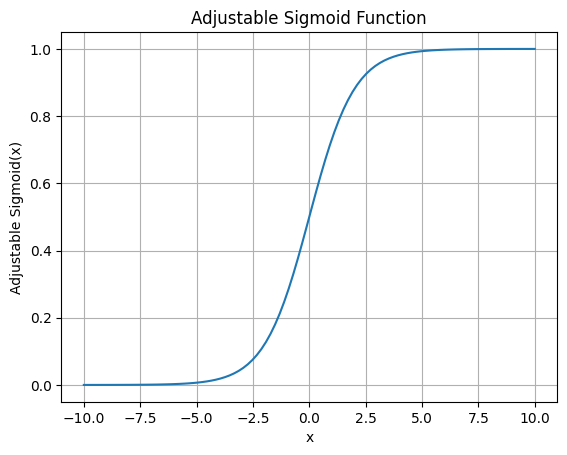

In [59]:
def adjustable_sigmoid(x, steepness):
    return 1 / (1 + np.exp(-x * steepness))

# Example usage
x = np.linspace(-10, 10, 100)  # Generate 100 points between -10 and 10
steepness = 1  # Set the steepness parameter
y = adjustable_sigmoid(x, steepness)

# Plot the adjustable sigmoid curve
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Adjustable Sigmoid(x)')
plt.title('Adjustable Sigmoid Function')
plt.grid(True)
plt.show()

## Integral of exponential, alpha, and double-exponential kernels

In [60]:
# analytical results
from sympy import symbols, exp, integrate, oo

# Define the symbols and parameters
t, tau, tau1, tau2 = symbols('t tau tau1 tau2')

# Define the functions
f1 = t/tau * exp(1 - t/tau)
f2 = exp(-t/tau)
f3 = exp(-t/tau1) - exp(-t/tau2)

# Calculate the integrals
result1 = integrate(f1, (t, 0, oo))
result2 = integrate(f2, (t, 0, oo))
result3 = integrate(f3, (t, 0, oo))

# Print the results
print("Integral of (t/tau) * exp(1 - t/tau) from t=0 to infinity:")
print(result1)
print("\nIntegral of exp(-t/tau) from t=0 to infinity:")
print(result2)
print("\nIntegral of exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:")
print(result3)

Integral of (t/tau) * exp(1 - t/tau) from t=0 to infinity:
Piecewise((E*tau, Abs(arg(tau)) < pi/2), (Integral(t*exp(-t/tau + 1)/tau, (t, 0, oo)), True))

Integral of exp(-t/tau) from t=0 to infinity:
Piecewise((tau, Abs(arg(tau)) < pi/2), (Integral(exp(-t/tau), (t, 0, oo)), True))

Integral of exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:
Piecewise((tau1 - tau2, (Abs(arg(tau1)) < pi/2) & (Abs(arg(tau2)) < pi/2)), (Integral(-exp(-t/tau2) + exp(-t/tau1), (t, 0, oo)), True))


The output you're seeing is due to the way SymPy handles complex numbers and the conditions for convergence of the integral.

The `Piecewise` function is used to define a function that behaves differently depending on the input. In this case, it's saying that the integral equals `E*tau` or `tau` when the absolute value of the argument of `tau` is less than `pi/2`, and otherwise it's equal to the unevaluated integral.

The `arg` function returns the argument (also known as the phase) of a complex number. The argument of a complex number is the angle it makes with the positive real axis in the complex plane. The condition `Abs(arg(tau)) < pi/2` is essentially checking if `tau` is a positive real number. If `tau` is a positive real number, then its argument is 0, which is less than `pi/2`.

In [61]:
# numerical results
from sympy import symbols, exp, integrate, oo

# Define the symbols and parameters
t, tau, tau1, tau2 = symbols('t tau tau1 tau2')

# Define the functions
f1 = t/tau * exp(1 - t/tau)
f2 = exp(-t/tau)
f3 = exp(-t/tau1) - exp(-t/tau2)

# Calculate the integrals
result1 = integrate(f1, (t, 0, oo)).subs(tau, 2)  # Example value: tau = 2
result2 = integrate(f2, (t, 0, oo)).subs(tau, 3)  # Example value: tau = 3
result3 = integrate(f3, (t, 0, oo)).subs({tau1: 5, tau2: 2})

# Evaluate the numerical results
num_result1 = result1.evalf()
num_result2 = result2.evalf()
num_result3 = result3.evalf()

# Print the numerical results
print("Numerical result of integral (t/tau) * exp(1 - t/tau) from t=0 to infinity:")
print(num_result1)
print("\nNumerical result of integral exp(-t/tau) from t=0 to infinity:")
print(num_result2)
print("\nNumerical result of integral exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:")
print(num_result3)

Numerical result of integral (t/tau) * exp(1 - t/tau) from t=0 to infinity:
5.43656365691809

Numerical result of integral exp(-t/tau) from t=0 to infinity:
3.00000000000000

Numerical result of integral exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:
3.00000000000000


In [62]:
# normalize f1, f2 and f3 and recalculate the numerical results
# for any tau value, the results are 1.

# Define the functions
f1 = t/tau * exp(1 - t/tau) / (exp(1) * tau)
f2 = exp(-t/tau) / tau
f3 = (exp(-t/tau1) - exp(-t/tau2)) / (tau1 - tau2)

# Calculate the integrals
result1 = integrate(f1, (t, 0, oo)).subs(tau, 5)
result2 = integrate(f2, (t, 0, oo)).subs(tau, 8)
result3 = integrate(f3, (t, 0, oo)).subs({tau1: 5, tau2: 2})

# Evaluate the numerical results
num_result1 = result1.evalf()
num_result2 = result2.evalf()
num_result3 = result3.evalf()

# Print the numerical results
print("Numerical result of integral (t/tau) * exp(1 - t/tau) from t=0 to infinity:")
print(num_result1)
print("\nNumerical result of integral exp(-t/tau) from t=0 to infinity:")
print(num_result2)
print("\nNumerical result of integral exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:")
print(num_result3)

Numerical result of integral (t/tau) * exp(1 - t/tau) from t=0 to infinity:
1.00000000000000

Numerical result of integral exp(-t/tau) from t=0 to infinity:
1.00000000000000

Numerical result of integral exp(-t/tau1) - exp(-t/tau2) from t=0 to infinity:
1.00000000000000


## Curves of exponential, alpha, and double-exponential kernels

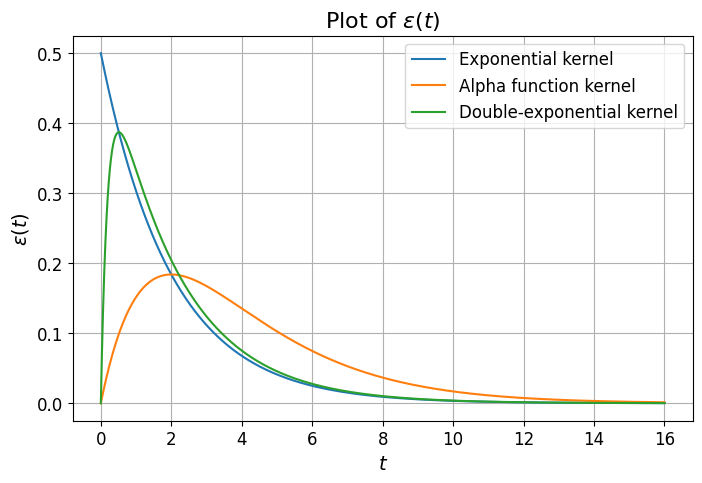

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation of Exponential kernel
def epsilon1(t, tau):
    return np.heaviside(t, 0) * (1 / tau) * np.exp(-t / tau)
    # np.heaviside(0, 0) = 0.0

# Define the equations of Alpha function kernel
def epsilon2(t, tau): #
    return np.heaviside(t, 0) * (t / (np.e * tau**2)) * np.exp(1 - (t / tau))

# Define the equations of Double-exponential kernel
def epsilon3(t, tau_decay, tau_rise):
    return (np.heaviside(t, 0) * (1 / (tau_decay - tau_rise)) *
            (np.exp(-t / tau_decay) - np.exp(-t / tau_rise)))

# Define the time range
infinitesimal = np.finfo(float).eps
t = np.linspace(infinitesimal, 16, 1000)

# Calculate the values of epsilon
tau = 2
epsilon1_values = epsilon1(t, tau) # Exponential kernel
tau = 2
epsilon2_values = epsilon2(t, tau) # Alpha function kernel
tau_decay = 2
tau_rise = 0.2
epsilon3_values = epsilon3(t, tau_decay, tau_rise) # Double-exponential kernel

# Plot the curve
plt.figure(figsize=(8, 5))
plt.plot(t, epsilon1_values, label='Exponential kernel')
plt.plot(t, epsilon2_values, label='Alpha function kernel')
plt.plot(t, epsilon3_values, label='Double-exponential kernel')
plt.xlabel('$t$', fontsize=14)  # Adjust x-axis label font size
plt.ylabel('$\epsilon(t)$', fontsize=14)  # Adjust y-axis label font size
plt.title('Plot of $\epsilon(t)$', fontsize=16)  # Adjust title font size
plt.legend(fontsize=12)  # Adjust legend font size
plt.grid(True)
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.show()

## Power-law funcs/curves

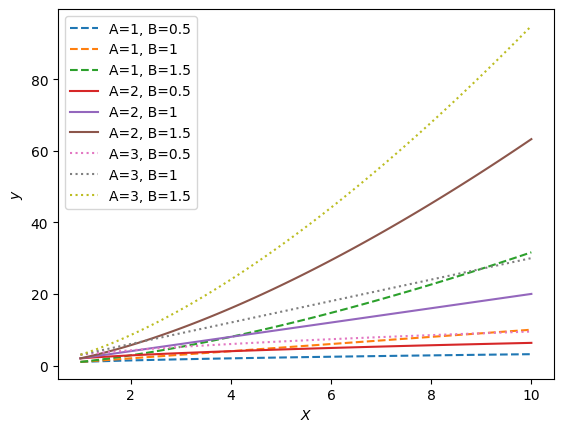

In [64]:
# Define the equation
def func(X, A, B):
    return A * X**B

# Generate x values
X = np.linspace(1, 10, 100)

# Set different values of A and B
A_values = [1, 2, 3]
B_values = [0.5, 1, 1.5]

# Define line styles for different A values
line_styles = ['--', '-', ':']

# Plot the curves for different A and B values
for i, A in enumerate(A_values):
    for B in B_values:
        y = func(X, A, B)
        label = f'A={A}, B={B}'
        line_style = line_styles[i % len(line_styles)]  # Cycle through line styles
        plt.plot(X, y, line_style, label=label)

# Add labels and legend
plt.xlabel(r'$X$')
plt.ylabel(r'$y$')
plt.legend()

# Show the plot
plt.show()

## Logistic regression details


For `sklearn.linear_model.LogisticRegression`, there is an argument called `multi-class` (see official description below), which determines the method used for multi-classification.

> multi_class{'auto', 'ovr', 'multinomial'}, default='auto'
If the option chosen is 'ovr', then a binary problem is fit for each label. For 'multinomial' the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. 'multinomial' is unavailable when solver='liblinear'. 'auto' selects 'ovr' if the data is binary, or if solver='liblinear', and otherwise selects 'multinomial'.

**OvR**

In logistic regression, the "One-vs-Rest" (OvR) approach is a common strategy **for handling multi-class classification problems**. In this approach, multiple binary logistic regression models are trained, each one considering one class as the positive class and the rest of the classes as the negative class.

After calculating the sigmoid probabilities for each class in the OvR approach, you can normalize the probabilities to ensure that their sum is equal to 1 (that's what `sklearn.linear_model.LogisticRegression` does for multi-class). Here's how you can do it:

1. Calculate the sigmoid probabilities for each class using the logistic regression model.

  The key point of logistic regression is that **we model the log of the odds ($O =\frac{p}{1-p}$) as linear**. This is called logistic regression.

  $$
  \eta=\mathrm{logit}(p)=\mathrm{log}\left(\frac{p}{1-p}\right)
  $$

  $$
  p= \mathrm{expit}(\eta)=\frac{e^\eta}{e^\eta+1}= \frac{1}{1+e^{-\eta}}
  $$

  where logit and expit are inverse functions of each other. The logit function maps probabilities (values between 0 and 1) to real numbers (values between negative infinity and positive infinity). The expit function is a sigmoid function that maps any real-valued number to the range of 0 to 1.

  For class $i$ and data $\boldsymbol{X}$, $\eta$ is considered as a linear combination (if we set intercept is True, then we have $\beta_{i,0}$) as follows.

  $$
  \begin{array}{l}
  \eta_i(\boldsymbol{X})&=\mathrm{logit}\left\{P(Y=y_i\mid \boldsymbol{X})\right\}\\
  &=\mathrm{logit}\left\{P(Y=y_i\mid X_1,X_2,\dots,X_N)\right\}\\
  &=\beta_{i,0}+\beta_{i,1}X_1+\beta_{i,2}X_2+\dots+\beta_{i,N}X_N
  \end{array}
  $$

  All $\beta_{i,n}$ forms an $I$ (number of classes) by $N$ (input length, i.e., the number of features) matrix, resulting in a 2D matrix of probabilities for each class and each piece of input data.

2. Normalize the probabilities by dividing each probability by the sum of all probabilities (for each piece of data $\boldsymbol{X}$):

   normalized_probs = probabilities / sum(probabilities)

   This step ensures that the sum of the probabilities for all classes is equal to 1.

Note that this normalization step is necessary because the sigmoid probabilities for each class are calculated independently, treating each class as a separate binary classification problem. Normalizing the probabilities ensures that they represent a valid probability distribution across all classes.

**Multinomial**

Multinomial Logistic Regression, also known as Softmax Regression, is an extension of logistic regression that is used for multi-class classification problems. It allows for the prediction of probabilities across multiple mutually exclusive classes.

In multinomial logistic regression, the goal is to model the relationship between the predictor variables and the probabilities of each class. Instead of modeling binary outcomes, it deals with multiple classes. The model estimates the probabilities of each class and assigns the observation to the class with the highest probability.

The mathematical formulation of multinomial logistic regression involves the use of the softmax function. Given a set of predictor variables and their corresponding weights, the softmax function calculates the probabilities for each class.

Mathematically, the softmax function is defined as:

$$
p_i= \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

where $p_i = P(Y=y_i\mid \boldsymbol{X}) = P(Y=y_i\mid X_1,X_2,\dots,X_N)$ is the pribability of class $i$. In OvR, we model $\eta$ as linear; here we model $z$ as linear. $z_i = \beta_{i,0}+\beta_{i,1}X_1+\beta_{i,2}X_2+\dots+\beta_{i,N}X_N$ is is the linear combination of the predictor variables (if we set intercept is True, then we have $\beta_{i,0}$) and their corresponding weights for class $i$, and the sum is taken over all classes $j$.

To fit a multinomial logistic regression model, the weights or coefficients are estimated using maximum likelihood estimation or other optimization algorithms. The objective is to find the values of the weights that maximize the likelihood of observing the training data given the model.

Note that softmax function naturally guarantees that the sum of probabilities of all classes is 1, so no nomrmalization is needed. But OvR needs normalization for 3 or more classes (see the following for special case: binary classification).

**Special case: binary classification**

Note that for specaial case -- binary classification: in binary classification, ovr can guarantee that the sum of probabilities of 2 classes is 1 (it is to some extent intuitive. Mathematical proof should be easy).

Note that, differnet from multi-calss classification, in binary classification (the target array only contains two differnt classes, like 0 and 1), `sklearn.linear_model.LogisticRegression` no longer gives the coefficients and intercepts for all classes, but only gives the coefficients and intercepts for class 1. But we can swap the class (0 → 1, 1 → 0) to get the coefficients and intercepts for the other class.

See code and comments in code for more details.

### Generate data

In [65]:
# generate random data for rergession

import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of samples and features
num_samples_train = 200
num_samples_test = 6
num_features = 5

# Generate random input features for training and testing data
x_train = np.random.randn(num_samples_train, num_features)
x_test = np.random.randn(num_samples_test, num_features)

# Generate random binary labels for training and testing data
y_train_binary = np.random.randint(0, 2, size=num_samples_train)
y_test_binary = np.random.randint(0, 2, size=num_samples_test)
y_train_binary_swapped = 1 - y_train_binary # for testing prob sum is 1 for OvR binary classification and the probs are same as multinomial
y_test_binary_swapped = 1 - y_test_binary

y_train_multiclass = np.random.randint(0, 4, size=num_samples_train)
y_test_multiclass = np.random.randint(0, 4, size=num_samples_test)

### Multinomial multi-class classification (3 or more classes)

In [66]:
# 3 or more classes (multi-class classification)
# fit using multi_class='multinomial'.

# 1. we can see the the predicted probabilities ('y_prob.T') are same as 'softmax_result_linear'.
# So, the input to the softmax is the linear combination but not the output of logit funcstions.
# No logit funcstion is used in 'multinomial'. If we input the output of logit funcstions to softmax, the result is
# 'softmax_result_logits', which shows more even distribution because the input (output of logit function) is in a
# small interval [0, 1].

# 2. the output shape of coefficients is I by N: I is the number of classes, and N is the number of features

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
fit_result = model.fit(x_train, y_train_multiclass)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(model.coef_, x_test.T) + fit_result.intercept_[:, np.newaxis] # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_multiclass)
print(y_pred.shape, y_test_multiclass.shape)

Intercept shape: (4,) Coefficients shape: (4, 5)
Coefficients: [-0.02690423  0.12363447  0.01597261  0.01060562  0.18336131]
Intercept: 0.10900482538504756
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.3304651  0.26423911 0.3688098  0.27064204 0.34158595 0.22744391]
 [0.27531937 0.38650995 0.24046665 0.19114155 0.20773003 0.317364  ]
 [0.17298192 0.22327799 0.14456644 0.2680026  0.30203264 0.26397038]
 [0.22123361 0.12597295 0.24615712 0.27021381 0.14865139 0.19122171]]
$$$$$$$$$$$$$
result:
 [[0.57634604 0.53300947 0.60876839 0.52243285 0.58979184 0.48072151]
 [0.53126466 0.62540018 0.50360956 0.43585759 0.46648655 0.56365115]
 [0.41592542 0.49094934 0.37885671 0.51998717 0.55972368 0.51793756]
 [0.47664437 0.35238843 0.50945565 0.52203775 0.38487888 0.43767033]]
$$$$$$$$$$$$$
result_normalize:
 [[0.28814702 0.26627209 0.30427917 0.26117524 0.29476608 0.24036309]
 [0.26560836 0.31242712 0.2517179  0.21789444 0.23314058 0.28182832]
 [0.20794394 0.24526038 0.189363   0.2599526  0.27973862 0.

### OvR multi-class classification (3 or more classes)

In [67]:
# 3 or more classes (multi-class classification)
# fit using multi_class='ovr'.

# 1. we can see the the predicted probabilities ('y_prob.T') are same as 'result_normalize'.
# So, normalization is necessary for OvR logistic regression.

# 2. the output shape of coefficients is I by N: I is the number of classes, and N is the number of features

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='ovr')
fit_result = model.fit(x_train, y_train_multiclass)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(model.coef_, x_test.T) + fit_result.intercept_[:, np.newaxis] # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_multiclass)
print(y_pred.shape, y_test_multiclass.shape)

Intercept shape: (4,) Coefficients shape: (4, 5)
Coefficients: [-0.02839059  0.15257944  0.01812457  0.00269251  0.24462486]
Intercept: -1.0037010775150204
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.329005   0.26793515 0.36606798 0.27087988 0.34087975 0.2254274 ]
 [0.27666902 0.37889351 0.24325164 0.19052176 0.2075264  0.3171024 ]
 [0.16919533 0.22608803 0.13900234 0.26783833 0.3024563  0.26319361]
 [0.22513065 0.12708331 0.25167803 0.27076004 0.14913755 0.19427659]]
$$$$$$$$$$$$$
result:
 [[0.32471042 0.26994966 0.36574016 0.26608369 0.33667369 0.22154886]
 [0.27305759 0.38174228 0.24303381 0.18714839 0.20496577 0.31164657]
 [0.16698679 0.22778791 0.13887786 0.263096   0.29872435 0.25866529]
 [0.22219197 0.1280388  0.25145265 0.26596598 0.14729737 0.19093401]]
$$$$$$$$$$$$$
result_normalize:
 [[0.329005   0.26793515 0.36606798 0.27087988 0.34087975 0.2254274 ]
 [0.27666902 0.37889351 0.24325164 0.19052176 0.2075264  0.3171024 ]
 [0.16919533 0.22608803 0.13900234 0.26783833 0.3024563  0.

### Multinomial binary classification

In [68]:
# 2 classes (binary classification)
# fit using multi_class='multinomial'.

# 1. The output shape of coefficients becomes 1 by N but not 2 by N.
# softmax_result_logits, softmax_result_linear, result_normalize all becomes arrays with all elements being 1,
# because the dimension of vertical axis becomes 1 (lack of coefficients of class 0).
# That is, the model no longer gives the coefficients for class 0,
# but directly uses 1 - P(class 1) as the probability of class 0.

# SO, WE NEED TO check whether the probability of class 0 is exactly equal to 1 - P(class).
# We use y_train_binary_swapped and y_test_binary_swapped do the regression again in the next chunk.
# ALso, in the next chunk, we combine the two coefficients and two intercepts to calculate softmax_result_logits, softmax_result_linear, result_normalize.

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
fit_result = model.fit(x_train, y_train_binary)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

coeffi =  model.coef_ # record the coefficient to combine it with the coefficients in next chunk
intercept =  model.intercept_ # record the intercept to combine it with the coefficients in next chunk

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(model.coef_, x_test.T) + fit_result.intercept_[:, np.newaxis] # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_binary)
print(y_pred.shape, y_test_binary.shape)

Intercept shape: (1,) Coefficients shape: (1, 5)
Coefficients: [-0.12008008  0.17210147 -0.04720982  0.09785444  0.03054086]
Intercept: 0.023175838709870764
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.51525751 0.40788362 0.60511154 0.55391366 0.43772495 0.49977283]
 [0.48474249 0.59211638 0.39488846 0.44608634 0.56227505 0.50022717]]
$$$$$$$$$$$$$
result:
 [[0.49236947 0.54645579 0.44685037 0.47296436 0.53125923 0.50011359]]
$$$$$$$$$$$$$
result_normalize:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
softmax_result_linear:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
softmax_result_logits:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
||||---||||||||||||||||---||||
$$$$$$$$$$$$$
sum of y_prob.T:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of result:
 [0.49236947 0.54645579 0.44685037 0.47296436 0.53125923 0.50011359]
$$$$$$$$$$$$$
sum of result_normalize:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of softmax_result_linear:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of softmax_result_logits:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$


In [69]:
# 2 classes (binary classification)
# fit using multi_class='multinomial' (y_train_binary_swapped and y_test_binary_swapped).

# 1. We use y_train_binary_swapped do the regression again  and stack the coefficients and intercept with the ones from
# the previsous chunk using y_train_binary to get the complete the coefficients and intercepts. Then we calcuate
# softmax_result_logits, softmax_result_linear, result_normalize. Show that softmax_result_linear is same as the y_prob.

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
fit_result = model.fit(x_train, y_train_binary_swapped)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(np.vstack((coeffi, model.coef_)), x_test.T) + np.vstack((intercept[:, np.newaxis],
                fit_result.intercept_[:, np.newaxis])) # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_binary_swapped)
print(y_pred.shape, y_test_binary_swapped.shape)

Intercept shape: (1,) Coefficients shape: (1, 5)
Coefficients: [ 0.12008008 -0.17210147  0.04720982 -0.09785444 -0.03054086]
Intercept: -0.023175838709870653
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.48474249 0.59211638 0.39488846 0.44608634 0.56227505 0.50022717]
 [0.51525751 0.40788362 0.60511154 0.55391366 0.43772495 0.49977283]]
$$$$$$$$$$$$$
result:
 [[0.49236947 0.54645579 0.44685037 0.47296436 0.53125923 0.50011359]
 [0.50763053 0.45354421 0.55314963 0.52703564 0.46874077 0.49988641]]
$$$$$$$$$$$$$
result_normalize:
 [[0.49236947 0.54645579 0.44685037 0.47296436 0.53125923 0.50011359]
 [0.50763053 0.45354421 0.55314963 0.52703564 0.46874077 0.49988641]]
$$$$$$$$$$$$$
softmax_result_linear:
 [[0.48474249 0.59211638 0.39488846 0.44608634 0.56227505 0.50022717]
 [0.51525751 0.40788362 0.60511154 0.55391366 0.43772495 0.49977283]]
$$$$$$$$$$$$$
softmax_result_logits:
 [[0.49618481 0.5232112  0.47345018 0.48648547 0.51562452 0.50005679]
 [0.50381519 0.4767888  0.52654982 0.51351453 0.

### OvR binary classification

In [70]:
# 2 classes (binary classification)
# fit using multi_class='ovr'.

# 1. The output shape of coefficients becomes 1 by N but not 2 by N.
# softmax_result_logits, softmax_result_linear, result_normalize all becomes arrays with all elements being 1,
# because the dimension of vertical axis becomes 1 (lack of coefficients of class 0).
# That is, the model no longer gives the coefficients for class 0,
# but directly uses 1 - P(class 1) as the probability of class 0.

# 2. 'result' is same as 'y_prob' (second row, class 1).

# SO, WE NEED TO check whether the probability of class 0 is exactly equal to 1 - P(class).
# We use y_train_binary_swapped and y_test_binary_swapped do the regression again in the next chunk.
# ALso, in the next chunk, we combine the two coefficients and two intercepts to calculate softmax_result_logits, softmax_result_linear, result_normalize.

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='ovr')
fit_result = model.fit(x_train, y_train_binary)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

coeffi =  model.coef_ # record the coefficient to combine it with the coefficients in next chunk
intercept =  model.intercept_ # record the intercept to combine it with the coefficients in next chunk

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(model.coef_, x_test.T) + fit_result.intercept_[:, np.newaxis] # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_binary)
print(y_pred.shape, y_test_binary.shape)

Intercept shape: (1,) Coefficients shape: (1, 5)
Coefficients: [-0.23748101  0.34044485 -0.09304119  0.19323541  0.06040668]
Intercept: 0.04654959275815589
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.51483709 0.40872225 0.60358641 0.55316849 0.4384004  0.49963222]
 [0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]]
$$$$$$$$$$$$$
result:
 [[0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]]
$$$$$$$$$$$$$
result_normalize:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
softmax_result_linear:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
softmax_result_logits:
 [[1. 1. 1. 1. 1. 1.]]
$$$$$$$$$$$$$
||||---||||||||||||||||---||||
$$$$$$$$$$$$$
sum of y_prob.T:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of result:
 [0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]
$$$$$$$$$$$$$
sum of result_normalize:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of softmax_result_linear:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
sum of softmax_result_logits:
 [1. 1. 1. 1. 1. 1.]
$$$$$$$$$$$$$
|

In [71]:
# 2 classes (binary classification)
# fit using multi_class='ovr' (y_train_binary_swapped and y_test_binary_swapped).

# 1. We use y_train_binary_swapped do the regression again  and stack the coefficients and intercept with the ones from
# the previsous chunk using y_train_binary to get the complete the coefficients and intercepts. Then we calcuate
# 'softmax_result_logits', 'softmax_result_linear', 'result_normalize'. Show that both 'result' and 'result_normalize' are same as 'y_prob'.

# 2. 'result' in binary classification is normalized (I think it is easy to prove this). No need of extra normalization.

model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='ovr')
fit_result = model.fit(x_train, y_train_binary_swapped)
print("Intercept shape:", fit_result.intercept_.shape, "Coefficients shape:", fit_result.coef_.shape)
print("Coefficients:", model.coef_[0,:])
print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

expo = np.dot(np.vstack((coeffi, model.coef_)), x_test.T) + np.vstack((intercept[:, np.newaxis],
                fit_result.intercept_[:, np.newaxis])) # linear combination as the exponent
result = np.exp(expo) / (np.exp(expo) + 1) # OvR logistic regression probabilities before normalization
result_normalize = result/np.sum(result, axis=0) # OvR logistic regression probabilities after normalization
softmax_result_linear = np.exp(expo) / np.sum(np.exp(expo), axis=0) # multinomial logistic regression (Softmax regression)
softmax_result_logits = np.exp(result) / np.sum(np.exp(result), axis=0) # use OvR probabilities as the exponent in the softmax (this is wrong, just for comparison)

print("$$$$$$$$$$$$$")
print("y_prob.T:\n", y_prob.T)
print("$$$$$$$$$$$$$")
print("result:\n", result)
print("$$$$$$$$$$$$$")
print("result_normalize:\n", result_normalize)
print("$$$$$$$$$$$$$")
print("softmax_result_linear:\n", softmax_result_linear)
print("$$$$$$$$$$$$$")
print("softmax_result_logits:\n", softmax_result_logits)
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("sum of y_prob.T:\n", np.sum(y_prob.T, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result:\n", np.sum(result, axis=0))
print("$$$$$$$$$$$$$")
print("sum of result_normalize:\n", np.sum(result_normalize, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_linear:\n", np.sum(softmax_result_linear, axis=0))
print("$$$$$$$$$$$$$")
print("sum of softmax_result_logits:\n", np.sum(softmax_result_logits, axis=0))
print("$$$$$$$$$$$$$")

print("||||---||||||||||||||||---||||")

print("$$$$$$$$$$$$$")
print("y_prob.T.shape:\n", y_prob.T.shape)
print("$$$$$$$$$$$$$")
print("result.shape:\n", result.shape)
print("$$$$$$$$$$$$$")
print("result_normalize.shape:\n", result_normalize.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_linear.shape:\n", softmax_result_linear.shape)
print("$$$$$$$$$$$$$")
print("softmax_result_logits.shape:\n", softmax_result_logits.shape)
print("$$$$$$$$$$$$$")

print('*** *** ***')

# Print the predicted class labels
print(y_pred)
print(y_test_binary_swapped)
print(y_pred.shape, y_test_binary_swapped.shape)

Intercept shape: (1,) Coefficients shape: (1, 5)
Coefficients: [ 0.23748101 -0.34044485  0.09304119 -0.19323541 -0.06040668]
Intercept: -0.04654959275815589
--- --- ---
$$$$$$$$$$$$$
y_prob.T:
 [[0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]
 [0.51483709 0.40872225 0.60358641 0.55316849 0.4384004  0.49963222]]
$$$$$$$$$$$$$
result:
 [[0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]
 [0.51483709 0.40872225 0.60358641 0.55316849 0.4384004  0.49963222]]
$$$$$$$$$$$$$
result_normalize:
 [[0.48516291 0.59127775 0.39641359 0.44683151 0.5615996  0.50036778]
 [0.51483709 0.40872225 0.60358641 0.55316849 0.4384004  0.49963222]]
$$$$$$$$$$$$$
softmax_result_linear:
 [[0.47035193 0.67666778 0.30135321 0.39485199 0.62135724 0.50073556]
 [0.52964807 0.32333222 0.69864679 0.60514801 0.37864276 0.49926444]]
$$$$$$$$$$$$$
softmax_result_logits:
 [[0.492582   0.54551255 0.44839125 0.47344078 0.5307609  0.50018389]
 [0.507418   0.45448745 0.55160875 0.52655922 0.4

## Find indices for given value in a array

In [72]:
import numpy as np

# Create a NumPy array
y = np.array([10, 20, 25, 30, 25, 40])

# Find the indices where y == 25
indices = np.where(y == 25)

# Print the indices
print(indices)

# Create a 2D NumPy array
y = np.array([[10, 20, 30],
              [40, 25, 60],
              [25, 70, 80]])

# Find the indices where y == 25
indices_1 = np.argwhere(y == 25) # for 2D array, better to use argwhere, in form of [[x1,y1],[x2,y2],...]
indices_2 = np.where(y == 25) # in form of ([x1, x2], [y1, y2],...)

# Print the indices
print(indices_1, type(indices_1))
print(indices_2, type(indices_2))

(array([2, 4]),)
[[1 1]
 [2 0]] <class 'numpy.ndarray'>
(array([1, 2]), array([1, 0])) <class 'tuple'>


## Classify data into intervals (hitogram, np.digitize)

In [73]:
import numpy as np

# Create an array of values
x = np.array([-1, 1.2, 2.4, 3.6, 4.8, 6.0, 99])

# Define the bin edges
bin_edges = [0, 2, 4, 6, 8]

# Use np.digitize to assign values to bins
bin_indices = np.digitize(x, bin_edges)

# Print the bin indices
print(bin_indices)

[0 1 2 2 3 4 5]


## Reshape and Add new axis

In [74]:
# use np.reshape

array_1 = np.random.rand(5)
array_1 = array_1.reshape((5, 1))
print(array_1)
print(array_1.shape)

array_1 = np.random.rand(5)
array_1 = array_1.reshape((1, 5, 1, 1))
print(array_1)
print(array_1.shape)

[[0.96292688]
 [0.48354565]
 [0.80599255]
 [0.55022654]
 [0.04341253]]
(5, 1)
[[[[0.63315138]]

  [[0.95140334]]

  [[0.60161182]]

  [[0.81918886]]

  [[0.88420646]]]]
(1, 5, 1, 1)


In [75]:
# use np.newaxis

array_1 = np.random.rand(2,3)
array_1 = array_1[np.newaxis] # or [np.newaxis,:], [np.newaxis,:,:] (same results)
print(array_1)
print(array_1.shape)

array_1 = np.random.rand(2,3)
array_1 = array_1[:, :, np.newaxis]
print(array_1)
print(array_1.shape)

array_1 = np.random.rand(2,3)
array_1 = array_1[:, np.newaxis] # or [:, np.newaxis,:] (same results)
print(array_1)
print(array_1.shape)

[[[0.22807977 0.21204484 0.61098099]
  [0.41102847 0.8398613  0.90002312]]]
(1, 2, 3)
[[[0.35342138]
  [0.23687056]
  [0.78052552]]

 [[0.27480604]
  [0.82261432]
  [0.42373825]]]
(2, 3, 1)
[[[0.6675499  0.09553531 0.62385932]]

 [[0.45176768 0.58660846 0.16801421]]]
(2, 1, 3)


In [76]:
# use np.expand_dims

array_1 = np.random.rand(5)
array_1 = np.expand_dims(array_1, axis=1)  # same as array_1d[:, np.newaxis]
print(array_1)
print(array_1.shape)

[[0.73687374]
 [0.86279708]
 [0.2167398 ]
 [0.09571456]
 [0.02363859]]
(5, 1)
